In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

In [3]:
cust_acq = pd.read_csv('C:/Venkat/Data Science/Python/Case Study/Python Foundation Case Study 2 - Credit Card Case Study/Customer Acqusition.csv')
cust_repayment = pd.read_csv('C:/Venkat/Data Science/Python/Case Study/Python Foundation Case Study 2 - Credit Card Case Study/Repayment.csv')
cust_spend = pd.read_csv('C:/Venkat/Data Science/Python/Case Study/Python Foundation Case Study 2 - Credit Card Case Study/spend.csv')

In [4]:
cust_acq

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [5]:
cust_acq = cust_acq.drop(['No'], axis = 1)

In [6]:
cust_acq.isna().sum()

Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [7]:
cust_repayment

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN
...,...,...,...,...,...
1518,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN,NaN


In [8]:
cust_repayment.isna().sum()

SL No:          24
Customer        23
Month           23
Amount          23
Unnamed: 4    1523
dtype: int64

In [9]:
cust_repayment = cust_repayment.drop(['Unnamed: 4', 'SL No:'], axis = 1)
cust_repayment

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88
...,...,...,...
1518,NaN,NaN,NaN
1519,NaN,NaN,NaN
1520,NaN,NaN,NaN
1521,NaN,NaN,NaN


In [10]:
cust_repayment.dropna(inplace = True)
cust_repayment

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88
...,...,...,...
1495,A67,9-May-05,55638.77
1496,A68,10-May-06,319836.49
1497,A69,11-Jul-06,247628.45
1498,A70,12-Aug-05,454016.51


In [11]:
cust_repayment.isna().sum()

Customer    0
Month       0
Amount      0
dtype: int64

In [12]:
cust_repayment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  1500 non-null   object 
 1   Month     1500 non-null   object 
 2   Amount    1500 non-null   float64
dtypes: float64(1), object(2)
memory usage: 46.9+ KB


In [13]:
cust_repayment['Month'] = pd.to_datetime(cust_repayment['Month'])

In [14]:
cust_repayment.rename(columns = {'Month' : 'Date'}, inplace = True)
cust_repayment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  1500 non-null   object        
 1   Date      1500 non-null   datetime64[ns]
 2   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 46.9+ KB


In [15]:
cust_spend

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [16]:
cust_spend = cust_spend.drop(['Sl No:'], axis = 1)

In [17]:
cust_spend.isna().sum()

Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [18]:
cust_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  1500 non-null   object 
 1   Month     1500 non-null   object 
 2   Type      1500 non-null   object 
 3   Amount    1500 non-null   float64
dtypes: float64(1), object(3)
memory usage: 47.0+ KB


In [19]:
cust_spend['Month'] = pd.to_datetime(cust_spend['Month'])

In [20]:
cust_spend.rename(columns = {'Month' : 'Date'}, inplace = True)
cust_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  1500 non-null   object        
 1   Date      1500 non-null   datetime64[ns]
 2   Type      1500 non-null   object        
 3   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 47.0+ KB


## 1. In the above dataset,
### a. In case age is less than 18, replace it with mean of age values.

In [21]:
cust_acq['Age'] = np.where(cust_acq['Age'] < 18, cust_acq.Age.mean(), cust_acq.Age)

### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [22]:
cust_acq

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...
95,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [23]:
cust_repayment.head()

,Customer,Date,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02
2,A1,2004-01-15,259490.06
3,A1,2004-01-25,437555.12
4,A1,2005-01-17,165972.88


In [24]:
cust_spend.head()

,Customer,Date,Type,Amount
0,A1,2004-01-12,JEWELLERY,485470.80
1,A1,2004-01-03,PETRO,410556.13
2,A1,2004-01-15,CLOTHES,23740.46
3,A1,2004-01-25,FOOD,484342.47
4,A1,2005-01-17,CAMERA,369694.07


In [25]:
cust_acq_spend = pd.merge(left = cust_acq, right = cust_spend, on = 'Customer', how = 'inner')
cust_acq_spend

,Customer,Age,City,Product,Limit,Company,Segment,Date,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,139018.26
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,284521.06
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,90184.22


In [26]:
cust_acq_spend['Amount'] = np.where(cust_acq_spend['Amount'] > cust_acq_spend['Limit'], cust_acq_spend.Limit, cust_acq_spend.Amount)
cust_acq_spend

,Customer,Age,City,Product,Limit,Company,Segment,Date,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,10000.00
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,10001.00
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,10002.00


### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [27]:
cust_acq_repayment = pd.merge(left = cust_acq, right = cust_repayment, on = 'Customer', how = 'inner')
cust_acq_repayment

,Customer,Age,City,Product,Limit,Company,Segment,Date,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,310992.30
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,121874.90
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,337815.57
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,25682.73


In [28]:
cust_acq_repayment['Amount'] = np.where(cust_acq_repayment['Amount'] > cust_acq_repayment['Limit'], cust_acq_repayment.Limit, cust_acq_repayment.Amount)
cust_acq_repayment

,Customer,Age,City,Product,Limit,Company,Segment,Date,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,100000.00
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,10000.00
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,10001.00
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,10002.00


## 2. From the above dataset create the following summaries:
### a. How many distinct customers exist?

In [29]:
unique_cust = cust_acq.Customer.nunique()
print('There are', unique_cust, 'Distinct customers exist')

There are 100 Distinct customers exist


### b. How many distinct categories exist?

In [30]:
unique_prod_cat = cust_acq.Product.value_counts()
unique_prod_cat

Gold        38
Platimum    32
Silver      30
Name: Product, dtype: int64

In [31]:
print('There are', unique_prod_cat.count(), 'unique product catergories available')

There are 3 unique product catergories available


In [32]:
unique_seg_cat = cust_acq.Segment.value_counts()
unique_seg_cat

Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: Segment, dtype: int64

In [33]:
print('There are', unique_seg_cat.count(), 'unique segment catergories available')

There are 5 unique segment catergories available


### c. What is the average monthly spend by customers?

In [34]:
cust_spend['Month'] = cust_spend['Date'].apply(lambda x:pd.Timestamp.strftime(x, format = '%b'))
cust_spend['Year'] = cust_spend['Date'].apply(lambda x:pd.Timestamp.strftime(x, format = '%Y'))
cust_spend

,Customer,Date,Type,Amount,Month,Year
0,A1,2004-01-12,JEWELLERY,485470.80,Jan,2004
1,A1,2004-01-03,PETRO,410556.13,Jan,2004
2,A1,2004-01-15,CLOTHES,23740.46,Jan,2004
3,A1,2004-01-25,FOOD,484342.47,Jan,2004
4,A1,2005-01-17,CAMERA,369694.07,Jan,2005
...,...,...,...,...,...,...
1495,A67,2006-02-04,BUS TICKET,356872.73,Feb,2006
1496,A68,2006-03-25,BUS TICKET,204971.10,Mar,2006
1497,A69,2006-03-31,BUS TICKET,50449.44,Mar,2006
1498,A70,2006-03-23,BUS TICKET,80593.94,Mar,2006


In [35]:
cust_spend.pivot_table(index = ['Year', 'Month'], values = 'Amount')

Amount
Year Month               
2004 Apr    235272.037143
     Feb    221215.270000
     Jan    251712.068664
     Mar    232146.119286
     May    217539.236429
     Nov    270486.397857
     Sep    310923.383571
2005 Apr    252181.326429
     Aug    233734.634286
     Dec    147503.060000
     Feb    229802.279821
     Jan    292741.372857
     Jul    229116.663571
     Jun    262688.112857
     May    245696.515429
     Nov    286143.322857
     Oct    194568.640714
     Sep    188666.202143
2006 Apr    232468.967553
     Aug    240699.717143
     Dec    270470.980714
     Feb    253858.260714
     Jan    282058.006429
     Jul    287505.098929
     Jun    177252.386429
     Mar    247166.084654
     May    236162.740357
     Nov    182841.290000
     Oct    236136.335000
     Sep    158520.090714

### d. What is the average monthly repayment by customers?

In [36]:
cust_repayment['Month'] = cust_repayment['Date'].apply(lambda x:pd.Timestamp.strftime(x, format = '%b'))
cust_repayment['Year'] = cust_repayment['Date'].apply(lambda x:pd.Timestamp.strftime(x, format = '%Y'))
cust_repayment

,Customer,Date,Amount,Month,Year
0,A1,2004-01-12,495414.75,Jan,2004
1,A1,2004-01-03,245899.02,Jan,2004
2,A1,2004-01-15,259490.06,Jan,2004
3,A1,2004-01-25,437555.12,Jan,2004
4,A1,2005-01-17,165972.88,Jan,2005
...,...,...,...,...,...
1495,A67,2005-05-09,55638.77,May,2005
1496,A68,2006-05-10,319836.49,May,2006
1497,A69,2006-07-11,247628.45,Jul,2006
1498,A70,2005-08-12,454016.51,Aug,2005


In [37]:
cust_repayment.pivot_table(index = ['Year', 'Month'], values = 'Amount')

Amount
Year Month               
2004 Apr    259141.679000
     Feb    256702.630741
     Jan    243489.649786
     Mar    252585.280667
     May    226162.720800
     Nov    209592.238000
     Sep    184487.848750
2005 Apr    212688.631333
     Aug    264430.921622
     Dec    320379.335833
     Feb    238829.265123
     Jan    240548.098148
     Jul    239871.479167
     Jun    210199.818333
     May    263207.367857
     Nov    256695.120000
     Oct    219849.956667
     Sep    247700.170000
2006 Apr    275472.251889
     Aug    224143.992500
     Dec    252736.569167
     Feb    284489.565128
     Jan    293475.389167
     Jul    257936.383243
     Jun    251990.453333
     Mar    240851.266814
     May    256920.884943
     Nov    199399.197407
     Oct    260765.480000
     Sep    262533.880833

### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [38]:
cust_final = pd.merge(left = cust_acq_spend, right = cust_repayment, on = 'Customer', how = 'inner')
cust_final

,Customer,Age,City,Product,Limit,Company,Segment,Date_x,Type,Amount_x,Date_y,Amount_y,Month,Year
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-12,495414.75,Jan,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-03,245899.02,Jan,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-15,259490.06,Jan,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-25,437555.12,Jan,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2005-01-17,165972.88,Jan,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,2004-01-25,310992.30,Jan,2004
37280,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,10000.00,2004-01-12,121874.90,Jan,2004
37281,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,10001.00,2004-01-03,337815.57,Jan,2004
37282,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,10002.00,2004-01-15,25682.73,Jan,2004


In [39]:
cust_final.rename(columns = {'Amount_x' : 'Amount_spend', 'Amount_y' : 'Amount_repay', 'Date_x' : 'Date_spend', 'Date_y' : 'Date_repay'}, inplace = True)

In [40]:
cust_final

,Customer,Age,City,Product,Limit,Company,Segment,Date_spend,Type,Amount_spend,Date_repay,Amount_repay,Month,Year
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-12,495414.75,Jan,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-03,245899.02,Jan,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-15,259490.06,Jan,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-25,437555.12,Jan,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2005-01-17,165972.88,Jan,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,2004-01-25,310992.30,Jan,2004
37280,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,10000.00,2004-01-12,121874.90,Jan,2004
37281,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,10001.00,2004-01-03,337815.57,Jan,2004
37282,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,10002.00,2004-01-15,25682.73,Jan,2004


In [41]:
cust_monthly_profit = cust_final.pivot_table(index = ['Year', 'Month'], values = ['Amount_spend', 'Amount_repay'], aggfunc = 'sum')
cust_monthly_profit

Amount_repay  Amount_spend
Year Month                            
2004 Apr    2.285403e+08  1.302768e+08
     Feb    1.602419e+08  8.712945e+07
     Jan    1.699210e+09  1.173709e+09
     Mar    8.974470e+07  6.064181e+07
     May    1.411594e+08  9.610982e+07
     Nov    7.860290e+07  6.135624e+07
     Sep    8.016122e+07  5.927289e+07
2005 Apr    1.747894e+08  1.052293e+08
     Aug    2.477449e+08  1.484403e+08
     Dec    9.944533e+07  4.784149e+07
     Feb    9.416163e+08  6.345617e+08
     Jan    1.810333e+08  1.392780e+08
     Jul    7.997268e+07  4.302163e+07
     Jun    2.213774e+08  1.297072e+08
     May    1.099197e+09  7.509787e+08
     Nov    2.763119e+08  1.711032e+08
     Oct    6.027830e+07  3.675003e+07
     Sep    7.530449e+07  3.896561e+07
2006 Apr    6.093666e+08  3.537178e+08
     Aug    7.167032e+07  6.239637e+07
     Dec    7.087702e+07  4.836229e+07
     Feb    2.903280e+08  1.764145e+08
     Jan    8.974491e+07  5.667580e+07
     Jul    2.245720e+08  1.541095e+08
     Jun    6.914431e+07  5.564123e+07
     Mar    1.115725e+09  7.934264e+08
     May    5.434823e+08  3.532008e+08
     Nov    1.355832e+08  1.195038e+08
     Oct    7.890924e+07  5.581328e+07
     Sep    8.083199e+07  5.885689e+07

In [42]:
cust_monthly_profit['Profit'] = (cust_monthly_profit['Amount_repay'] - cust_monthly_profit['Amount_spend'])*2.9/100
cust_monthly_profit

Amount_repay  Amount_spend        Profit
Year Month                                          
2004 Apr    2.285403e+08  1.302768e+08  2.849641e+06
     Feb    1.602419e+08  8.712945e+07  2.120261e+06
     Jan    1.699210e+09  1.173709e+09  1.523952e+07
     Mar    8.974470e+07  6.064181e+07  8.439837e+05
     May    1.411594e+08  9.610982e+07  1.306438e+06
     Nov    7.860290e+07  6.135624e+07  5.001530e+05
     Sep    8.016122e+07  5.927289e+07  6.057615e+05
2005 Apr    1.747894e+08  1.052293e+08  2.017243e+06
     Aug    2.477449e+08  1.484403e+08  2.879833e+06
     Dec    9.944533e+07  4.784149e+07  1.496511e+06
     Feb    9.416163e+08  6.345617e+08  8.904584e+06
     Jan    1.810333e+08  1.392780e+08  1.210906e+06
     Jul    7.997268e+07  4.302163e+07  1.071581e+06
     Jun    2.213774e+08  1.297072e+08  2.658436e+06
     May    1.099197e+09  7.509787e+08  1.009834e+07
     Nov    2.763119e+08  1.711032e+08  3.051053e+06
     Oct    6.027830e+07  3.675003e+07  6.823198e+05
     Sep    7.530449e+07  3.896561e+07  1.053828e+06
2006 Apr    6.093666e+08  3.537178e+08  7.413815e+06
     Aug    7.167032e+07  6.239637e+07  2.689446e+05
     Dec    7.087702e+07  4.836229e+07  6.529272e+05
     Feb    2.903280e+08  1.764145e+08  3.303490e+06
     Jan    8.974491e+07  5.667580e+07  9.590043e+05
     Jul    2.245720e+08  1.541095e+08  2.043413e+06
     Jun    6.914431e+07  5.564123e+07  3.915895e+05
     Mar    1.115725e+09  7.934264e+08  9.346672e+06
     May    5.434823e+08  3.532008e+08  5.518162e+06
     Nov    1.355832e+08  1.195038e+08  4.663023e+05
     Oct    7.890924e+07  5.581328e+07  6.697829e+05
     Sep    8.083199e+07  5.885689e+07  6.372780e+05

### f. What are the top 5 product types?

In [43]:
cust_final

,Customer,Age,City,Product,Limit,Company,Segment,Date_spend,Type,Amount_spend,Date_repay,Amount_repay,Month,Year
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-12,495414.75,Jan,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-03,245899.02,Jan,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-15,259490.06,Jan,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-25,437555.12,Jan,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2005-01-17,165972.88,Jan,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,2004-01-25,310992.30,Jan,2004
37280,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,10000.00,2004-01-12,121874.90,Jan,2004
37281,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,10001.00,2004-01-03,337815.57,Jan,2004
37282,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,10002.00,2004-01-15,25682.73,Jan,2004


In [44]:
top_product_types = cust_final['Type'].value_counts()
top_product_types.head(5)

PETRO           4829
CAMERA          4237
FOOD            4056
AIR TICKET      3537
TRAIN TICKET    3387
Name: Type, dtype: int64

### g. Which city is having maximum spend?

In [45]:
cust_final.pivot_table(index = 'City', values = 'Amount_spend', aggfunc = 'sum').sort_values(by = 'Amount_spend', ascending = False).head(1)

,Amount_spend
City,
COCHIN,1.244280e+09


### h. Which age group is spending more money?

In [46]:
cust_final['Age_group'] = pd.cut(cust_final['Age'], bins = np.arange(18,100,8), labels = ['18-25', '26-33', '34-41', '42-49', '50-57', '58-65', '66-73', '74-81', '82-89', '90-97'])
cust_final

,Customer,Age,City,Product,Limit,Company,Segment,Date_spend,Type,Amount_spend,Date_repay,Amount_repay,Month,Year,Age_group
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-12,495414.75,Jan,2004,74-81
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-03,245899.02,Jan,2004,74-81
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-15,259490.06,Jan,2004,74-81
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-25,437555.12,Jan,2004,74-81
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2005-01-17,165972.88,Jan,2005,74-81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,2004-01-25,310992.30,Jan,2004,50-57
37280,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,10000.00,2004-01-12,121874.90,Jan,2004,50-57
37281,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,10001.00,2004-01-03,337815.57,Jan,2004,50-57
37282,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,10002.00,2004-01-15,25682.73,Jan,2004,34-41


In [47]:
cust_final.pivot_table(index = 'Age_group', values = 'Amount_spend', aggfunc = 'sum').sort_values(by = 'Amount_spend', ascending = False).head(1)

,Amount_spend
Age_group,
42-49,1.597535e+09


### i. Who are the top 10 customers in terms of repayment?

In [48]:
cust_final.pivot_table(index = 'Customer', values = 'Amount_repay', aggfunc = 'sum').sort_values(by = 'Amount_repay', ascending = False).head(10)

,Amount_repay
Customer,
A61,4.004874e+08
A60,3.752990e+08
A22,3.092945e+08
A21,2.988591e+08
A13,2.967320e+08
A43,2.631860e+08
A45,2.618984e+08
A12,2.583776e+08
A48,2.570649e+08


## 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [49]:
cust_acq_spend['Year'] = cust_acq_spend['Date'].apply(lambda x:pd.Timestamp.strftime(x, format = '%Y'))
cust_acq_spend

,Customer,Age,City,Product,Limit,Company,Segment,Date,Type,Amount,Year
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,2005
...,...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,2004
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,10000.00,2004
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,10001.00,2004
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,10002.00,2004


In [50]:
city_spend_yearly = cust_acq_spend.pivot_table(index = ['City', 'Year'], columns = 'Product', values = 'Amount', aggfunc = 'sum')
city_spend_yearly

Product                 Gold    Platimum      Silver
City       Year                                     
BANGALORE  2004   9289878.54  1862755.80  2291866.58
           2005  12892362.99  1532304.97  1580621.84
           2006  12030611.09  1100845.77  2165487.94
BOMBAY     2004   6987853.53  1637282.44  1032089.03
           2005   8983018.28  1401821.94  1008990.04
           2006   7917144.31  1737152.51  1592833.80
CALCUTTA   2004   7477140.98  2207700.80  1000012.00
           2005  10303355.80  4719709.81   690149.06
           2006  11167532.77  3959625.16  1807966.92
CHENNAI    2004   1059618.50  3570652.38   432061.36
           2005   3740945.58  5118956.32   477187.49
           2006   2704288.62  5079923.40   700019.00
COCHIN     2004   7315850.15  3829916.07  1514242.12
           2005  12110613.03  5430931.71  1202283.38
           2006  10499142.38  5505608.29  1970005.87
DELHI      2004   2806495.00   483518.89  1518182.30
           2005   1964845.27   844168.36  1012316.21
           2006   2957103.32   276791.72  1604908.97
PATNA      2004   2072567.90  1113069.60  1356689.10
           2005   3252615.77  2883231.07  1800099.19
           2006   2276181.69  1256137.65  1400010.00
TRIVANDRUM 2004   2415102.84  2196679.67   409669.48
           2005   1240375.85  3671450.30   519915.49
           2006   2735710.87  2202409.25  1005866.62

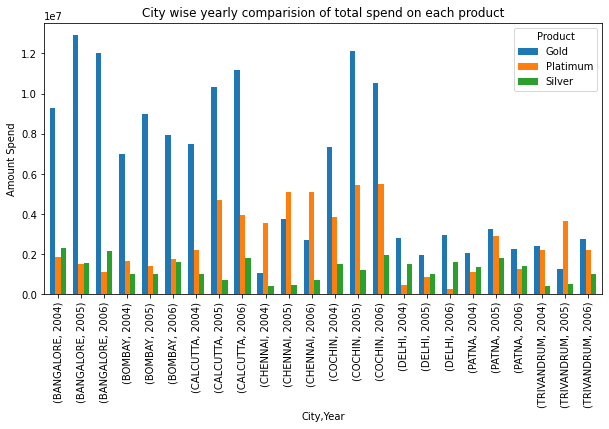

In [51]:
city_spend_yearly.plot(kind = 'bar', figsize = (10,5), width = 0.7, xlabel = 'City,Year', ylabel = 'Amount Spend', title = 'City wise yearly comparision of total spend on each product')
plt.show()

## 4. Create graphs for
### a. Monthly comparison of total spends, city wise

In [52]:
cust_acq_spend['Month'] = cust_acq_spend['Date'].apply(lambda x:pd.Timestamp.strftime(x, format = '%B'))
cust_acq_spend

,Customer,Age,City,Product,Limit,Company,Segment,Date,Type,Amount,Year,Month
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004,January
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,2004,January
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,2004,January
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,2004,January
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,2005,January
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,2004,January
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,10000.00,2004,January
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,10001.00,2004,January
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,10002.00,2004,January


In [53]:
city_spend_monthly = cust_acq_spend.pivot_table(index = 'City', columns = 'Month', values = 'Amount', aggfunc = 'sum')
city_spend_monthly

Month,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4472986.48,800063.95,477168.74,7299507.26,10296824.84,2483222.19,1380686.40,6102915.07,7008131.13,2375605.57,1246605.61,803018.28
BOMBAY,2278787.51,1066744.75,240042.21,4857000.80,6784005.33,277727.32,1272594.97,5807861.50,4316954.60,3282054.40,731007.20,1383405.29
CALCUTTA,3787515.45,1563356.52,110003.00,8440553.11,9529878.40,2239574.27,2298046.31,5294052.04,5948254.87,2298884.43,201358.83,1621716.07
CHENNAI,2588658.49,310875.97,223628.27,4460817.45,4611964.36,748827.27,1259242.16,3348647.21,3026204.12,1347779.28,156247.17,800760.90
COCHIN,4262753.94,2367306.61,969534.55,6317897.38,12514391.54,1440900.80,2500746.07,6140161.53,7111096.69,3433004.60,883553.89,1437245.40
DELHI,1227247.25,205403.66,892343.52,1744069.06,3564274.95,100003.00,661279.59,2567153.52,1850324.57,491613.46,64615.46,100002.00
PATNA,2438179.53,469383.64,100000.00,2603335.55,5466210.55,100000.00,996187.13,1937170.61,2486589.80,413677.87,329537.34,70329.95
TRIVANDRUM,1374297.45,508774.94,640922.26,2987127.89,3889341.49,270485.50,405337.33,2662321.01,2983537.98,198388.40,285581.92,191064.20


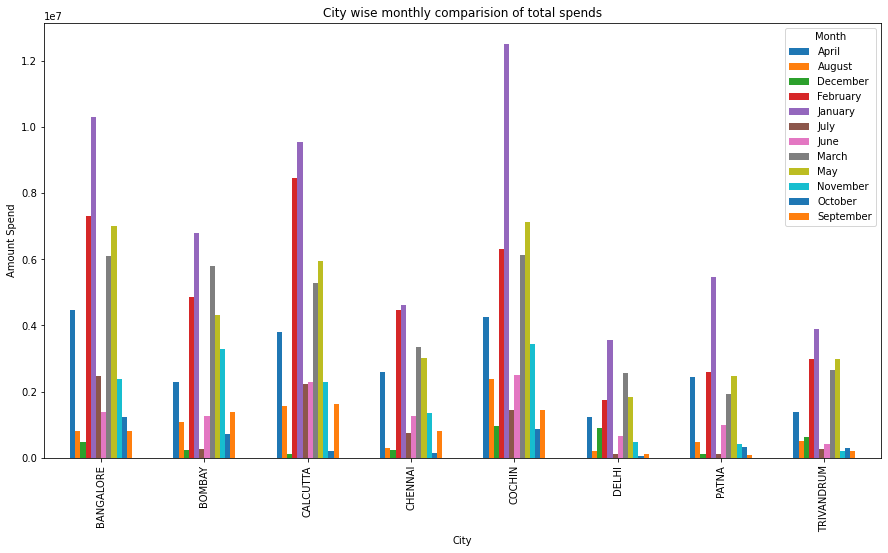

In [54]:
city_spend_monthly.plot(kind = 'bar', figsize = (15,8), width = 0.6, xlabel = 'City', ylabel = 'Amount Spend', title = 'City wise monthly comparision of total spends')
plt.show()

### b. Comparison of yearly spend on air tickets

In [55]:
cust_spend_airticket = cust_acq_spend.pivot_table(index = ['Type','Year'], values = 'Amount', aggfunc = 'sum').reset_index()
cust_spend_airticket = cust_spend_airticket.loc[cust_spend_airticket['Type'] == 'AIR TICKET']
cust_spend_airticket

,Type,Year,Amount
0,AIR TICKET,2004,5077241.35
1,AIR TICKET,2005,11135167.21
2,AIR TICKET,2006,6088483.56


Text(0.5, 1.0, 'Yearly spend on Air tickets')

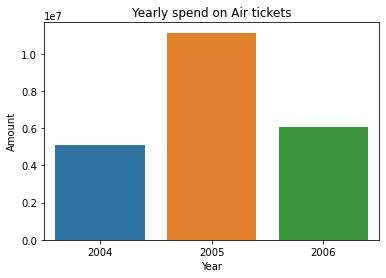

In [56]:
sns.barplot(x = 'Year', y = 'Amount', data = cust_spend_airticket)
plt.title('Yearly spend on Air tickets')

### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [57]:
cust_monthlyspend_products = cust_acq_spend.pivot_table(index = ['Product','Month'], values = 'Amount', aggfunc = 'sum').reset_index()
cust_monthlyspend_products

,Product,Month,Amount
0,Gold,April,13170572.59
1,Gold,August,4954030.42
2,Gold,December,2332940.96
3,Gold,February,24779179.55
4,Gold,January,32413831.83
5,Gold,July,5167416.37
6,Gold,June,6538862.64
7,Gold,March,19256972.48
8,Gold,May,21548169.76
9,Gold,November,9203267.46


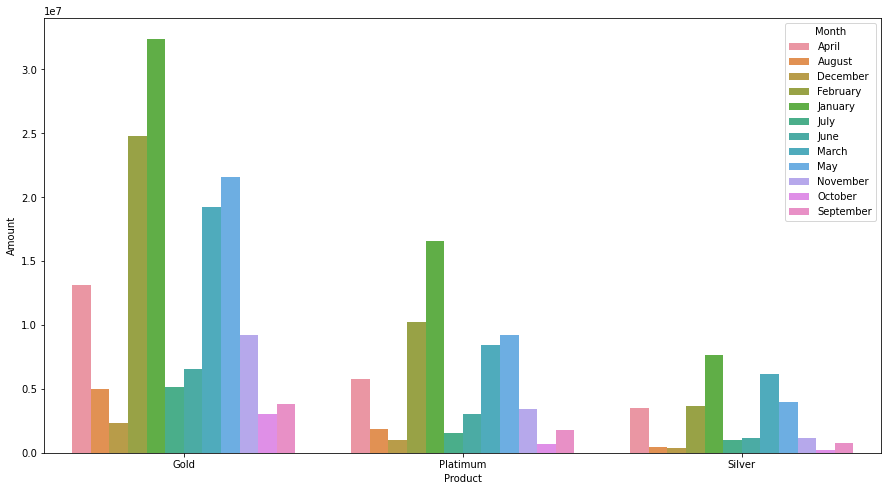

In [58]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'Product', y = 'Amount', data = cust_monthlyspend_products, hue = 'Month')
plt.show()

## 5. Write user defined PYTHON function to perform the following analysis:
### You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [59]:
cust_acq_repayment['Month'] = cust_acq_repayment['Date'].apply(lambda x:pd.Timestamp.strftime(x, format = '%B'))
cust_acq_repayment['Year'] = cust_acq_repayment['Date'].apply(lambda x:pd.Timestamp.strftime(x, format = '%Y'))
cust_acq_repayment

,Customer,Age,City,Product,Limit,Company,Segment,Date,Amount,Month,Year
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,January,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,January,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06,January,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12,January,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88,January,2005
...,...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,100000.00,January,2004
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,10000.00,January,2004
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,10001.00,January,2004
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,10002.00,January,2004


In [60]:
def top_cust(Product, Time_period):
    if Product.lower() == 'gold' and Time_period.lower() == 'monthly':
        product = cust_acq_repayment.pivot_table(index = ['Product', 'City', 'Customer'], columns='Month', values='Amount', aggfunc='sum')
        final = product.loc[('Gold',['CHENNAI', 'COCHIN', 'TRIVANDRUM', 'BANGALORE', 'DELHI', 'BOMBAY', 'CALCUTTA', 'PATNA']), ::]
    elif Product.lower() == 'gold' and Time_period.lower() == 'yearly':
        product = cust_acq_repayment.pivot_table(index = ['Product', 'City', 'Customer'], columns='Year', values='Amount', aggfunc='sum')
        final = product.loc[('Gold',['CHENNAI', 'COCHIN', 'TRIVANDRUM', 'BANGALORE', 'DELHI', 'BOMBAY', 'CALCUTTA', 'PATNA']), ::]
    elif Product.lower() == 'silver' and Time_period.lower() == 'monthly':
        product = cust_acq_repayment.pivot_table(index = ['Product', 'City', 'Customer'], columns='Month', values='Amount', aggfunc='sum')
        final = product.loc[('Silver',['CHENNAI', 'COCHIN', 'TRIVANDRUM', 'BANGALORE', 'DELHI', 'BOMBAY', 'CALCUTTA', 'PATNA']), ::]
    elif Product.lower() == 'silver' and Time_period.lower() == 'yearly':
        product = cust_acq_repayment.pivot_table(index = ['Product', 'City', 'Customer'], columns='Year', values='Amount', aggfunc='sum')
        final = product.loc[('Silver',['CHENNAI', 'COCHIN', 'TRIVANDRUM', 'BANGALORE', 'DELHI', 'BOMBAY', 'CALCUTTA', 'PATNA']), ::]
    elif Product.lower() == 'platinum' and Time_period.lower() == 'monthly':
        product = cust_acq_repayment.pivot_table(index = ['Product', 'City', 'Customer'], columns='Month', values='Amount', aggfunc='sum')
        final = product.loc[('Platimum',['CHENNAI', 'COCHIN', 'TRIVANDRUM', 'BANGALORE', 'DELHI', 'BOMBAY', 'CALCUTTA', 'PATNA']), ::]
    elif Product.lower() == 'platinum' and Time_period.lower() == 'yearly':
        product = cust_acq_repayment.pivot_table(index = ['Product', 'City', 'Customer'], columns='Year', values='Amount', aggfunc='sum')
        final = product.loc[('Platimum',['CHENNAI', 'COCHIN', 'TRIVANDRUM', 'BANGALORE', 'DELHI', 'BOMBAY', 'CALCUTTA', 'PATNA']), ::]
    return final

In [64]:
top_cust('Gold', 'monthly')

Month                             April     August   December    February  \
Product City       Customer                                                 
Gold    CHENNAI    A27        379529.81  472123.57  136860.63   841114.02   
                   A67              NaN        NaN        NaN         NaN   
        COCHIN     A11        958466.08  332677.61        NaN  1069789.26   
                   A16        338710.86        NaN        NaN   331143.85   
                   A32        333042.82   99528.43        NaN   851127.91   
                   A45       1435443.21  431769.44  410935.52  1241580.90   
                   A61       3412860.60  197804.13        NaN  1345911.54   
                   A65              NaN        NaN        NaN         NaN   
                   A90        109931.32        NaN        NaN         NaN   
                   A94              NaN        NaN        NaN         NaN   
        TRIVANDRUM A28        115326.71  437823.07  451630.26   968709.79   
        BANGALORE  A1         508949.16        NaN        NaN   781873.80   
                   A13        494392.40  873304.51        NaN  2049808.15   
                   A14        812582.20  198623.13  388821.96  1482923.34   
                   A30        425694.16        NaN        NaN  1321469.80   
                   A43        612541.80        NaN        NaN   763846.93   
                   A63              NaN        NaN        NaN         NaN   
                   A81              NaN        NaN        NaN         NaN   
                   A88              NaN        NaN        NaN         NaN   
                   A92        459105.69        NaN        NaN         NaN   
        DELHI      A44        346650.76  539494.72   79696.21   745752.19   
                   A64              NaN        NaN  212614.48         NaN   
                   A82              NaN        NaN        NaN         NaN   
                   A93              NaN        NaN        NaN         NaN   
        BOMBAY     A12        601326.07  120471.17        NaN  1978117.59   
                   A17        391463.29   98341.04  479227.30   374865.01   
                   A42        173199.87        NaN        NaN   476213.23   
                   A62       1115760.01        NaN        NaN   478764.07   
                   A91        247781.00        NaN        NaN         NaN   
        CALCUTTA   A10        478747.41        NaN        NaN   652033.51   
                   A15              NaN   17981.25        NaN   516544.51   
                   A29              NaN  534103.41        NaN   627147.67   
                   A31         13054.67        NaN        NaN   962656.24   
                   A60       2397565.91  735660.40        NaN  1403731.08   
                   A89        497237.97        NaN        NaN         NaN   
        PATNA      A26        558432.60  398164.37  417177.67  1298000.32   
                   A66              NaN        NaN        NaN         NaN   
                   A95              NaN        NaN        NaN         NaN   

Month                           January        July       June       March  \
Product City       Customer                                                  
Gold    CHENNAI    A27       1215350.93   241912.50  484419.68   976107.81   
                   A67         67845.60         NaN        NaN         NaN   
        COCHIN     A11        958556.39   128484.37        NaN   508638.02   
                   A16       1071852.72   367100.15   92055.06   886861.02   
                   A32              NaN   137150.37  284410.26   540858.16   
                   A45       2033076.43         NaN  303151.38   869686.35   
                   A61       1755251.93   441593.08        NaN   382632.66   
                   A65        468922.60         NaN        NaN         NaN   
                   A90              NaN         NaN        NaN         NaN   
                   A94        153465.89         NaN        Na